2023-01-19 15:28:51.699 - [NOTICE] callbacks.on_cycle_start(174): Cycle 1/3 (12.438 ms elapsed) --------------------
2023-01-19 15:28:51.700 - [NOTICE] callbacks.on_step_start(182): Cycle 1/3, step 1/5: Discharge at C/5 for 10 hours or until 3.3 V
2023-01-19 15:28:52.133 - [NOTICE] callbacks.on_step_start(182): Cycle 1/3, step 2/5: Rest for 1 hour
2023-01-19 15:28:52.274 - [NOTICE] callbacks.on_step_start(182): Cycle 1/3, step 3/5: Charge at 1 A until 4.1 V
2023-01-19 15:28:52.583 - [NOTICE] callbacks.on_step_start(182): Cycle 1/3, step 4/5: Hold at 4.1 V until 1 mA
2023-01-19 15:28:53.107 - [NOTICE] callbacks.on_step_start(182): Cycle 1/3, step 5/5: Rest for 1 hour
2023-01-19 15:28:53.323 - [NOTICE] callbacks.on_cycle_start(174): Cycle 2/3 (1.636 s elapsed) --------------------
2023-01-19 15:28:53.323 - [NOTICE] callbacks.on_step_start(182): Cycle 2/3, step 1/5: Discharge at C/5 for 10 hours or until 3.3 V
2023-01-19 15:28:53.569 - [NOTICE] callbacks.on_step_start(182): Cycle 2/3, ste

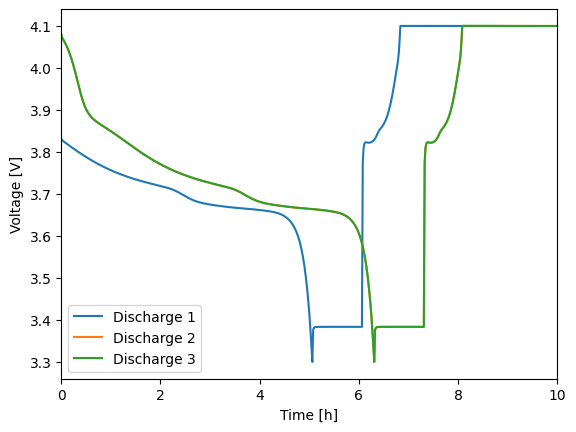

interactive(children=(FloatSlider(value=0.0, description='t', max=29.23518314314029, step=0.2923518314314029),…

In [3]:
# Constant-current constant-voltage charge
#
import pybamm
import matplotlib.pyplot as plt

pybamm.set_logging_level("NOTICE")
experiment = pybamm.Experiment(
    [
        (
            "Discharge at C/5 for 10 hours or until 3.3 V",
            "Rest for 1 hour",
            "Charge at 1 A until 4.1 V",
            "Hold at 4.1 V until 1 mA",
            "Rest for 1 hour",
        ),
    ]
    * 3
)
model = pybamm.lithium_ion.DFN()

sim = pybamm.Simulation(
    model, experiment=experiment, solver=pybamm.CasadiSolver("fast with events")
)
sim.solve()

# Plot voltages from the discharge segments only
fig, ax = plt.subplots()
for i in range(3):
    # Extract sub solutions
    sol = sim.solution.cycles[i]
    # Extract variables
    t = sol["Time [h]"].entries
    V = sol["Terminal voltage [V]"].entries
    # Plot
    ax.plot(t - t[0], V, label="Discharge {}".format(i + 1))
    ax.set_xlabel("Time [h]")
    ax.set_ylabel("Voltage [V]")
    ax.set_xlim([0, 10])
ax.legend(loc="lower left")

# Save time, voltage, current, discharge capacity, temperature, and electrolyte
# concentration to csv and matlab formats
sim.solution.save_data(
    "output.mat",
    [
        "Time [h]",
        "Current [A]",
        "Terminal voltage [V]",
        "Discharge capacity [A.h]",
        "X-averaged cell temperature [K]",
        "Electrolyte concentration [mol.m-3]",
    ],
    to_format="matlab",
    short_names={
        "Time [h]": "t",
        "Current [A]": "I",
        "Terminal voltage [V]": "V",
        "Discharge capacity [A.h]": "Q",
        "X-averaged cell temperature [K]": "T",
        "Electrolyte concentration [mol.m-3]": "c_e",
    },
)
# We can only save 0D variables to csv
sim.solution.save_data(
    "output.csv",
    [
        "Time [h]",
        "Current [A]",
        "Terminal voltage [V]",
        "Discharge capacity [A.h]",
        "X-averaged cell temperature [K]",
    ],
    to_format="csv",
)

# Show all plots
sim.plot()


In [2]:
# plot
pybamm.dynamic_plot(
    sim,
    [
        "Positive electrode potential [V]",
        "Electrolyte potential [V]",
        "Positive electrode interfacial current density [A.m-2]",
        "Positive particle surface concentration [mol.m-3]",
        "Average positive particle surface concentration [mol.m-3]",
        ["Positive electrode OCP [V]", "Terminal voltage [V]"],
    ],
)

KeyError: "'Average positive particle surface concentration [mol.m-3]' not found. Best matches are ['X-averaged positive particle surface concentration [mol.m-3]', 'Average positive particle concentration [mol.m-3]', 'Positive particle surface concentration [mol.m-3]']"